In [69]:
# Import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.applications.resnet import ResNet50,preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import numpy
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224,224]
BATCH_SIZE = 32
EPOCHS = 50

train_path = "Datasets/Train/"
test_path = "Datasets/Test/"

In [64]:
def create_model(model_name, best_model_name):
    
    base_model = model_name(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)
    
    # don't train existing weights
    for layer in base_model.layers:
        layer.trainable = False
        
    # for getting number of output classes
    folders = os.listdir(train_path)
    
    # our layers
    x = Flatten()(base_model.output)
    
    prediction = Dense(len(folders), activation="softmax")(x)
    
    model = Model(inputs=base_model.input, outputs=prediction)
    
    model.compile(
        loss="categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )
    
    
    train_datagen = ImageDataGenerator(rescale = 1./255,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True)
    
    test_datagen = ImageDataGenerator(rescale = 1./255)
    
    train_set = train_datagen.flow_from_directory(train_path,
                                                target_size = IMAGE_SIZE,
                                                batch_size = BATCH_SIZE,
                                                class_mode = "categorical")
    
    test_set = test_datagen.flow_from_directory(test_path,
                                              target_size = IMAGE_SIZE,
                                              batch_size = BATCH_SIZE,
                                              class_mode = "categorical")
    
    
    es = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=50)
    
    mc = ModelCheckpoint(best_model_name, monitor='val_accuracy',mode='max',verbose=1)
    
    r = model.fit(train_set,
              validation_data = test_set,
              epochs = EPOCHS,
              steps_per_epoch = len(train_set),
              validation_steps = len(test_set),
              callbacks=[es, mc])
    
    return r, model, test_set

#### I've used four popular Transfer Learning Models - ResNet50, VGG16, InceptionV3 and Xception

#### ResNet50

In [27]:
r, model, test_set = create_model(ResNet50, 'best_resnet_model.h5')

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.8006 - accuracy: 0.7000
Epoch 00001: saving model to best_resnet_model.h5


C:\Users\vidhy\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


10/10 [==============================] - 8s 809ms/step - loss: 0.8006 - accuracy: 0.7000 - val_loss: 2.3179 - val_accuracy: 0.3100
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.8235 - accuracy: 0.6733
Epoch 00002: saving model to best_resnet_model.h5
10/10 [==============================] - 7s 682ms/step - loss: 0.8235 - accuracy: 0.6733 - val_loss: 2.1352 - val_accuracy: 0.3100
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 1.0112 - accuracy: 0.5933
Epoch 00003: saving model to best_resnet_model.h5
10/10 [==============================] - 6s 625ms/step - loss: 1.0112 - accuracy: 0.5933 - val_loss: 2.4202 - val_accuracy: 0.3100
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 1.2025 - accuracy: 0.5800
Epoch 00004: saving model to best_resnet_model.h5
10/10 [==============================] - 6s 597ms/step - loss: 1.2025 - accuracy: 0.5800 - val_loss: 2.3509 - val_accuracy: 0.3200
Epoch 5/50
10/10 [==========================

In [12]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [25]:
# ResNet50 model
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 1s - loss: 1.9193 - accuracy: 0.3600 - 1s/epoch - 274ms/step
Restored model, accuracy: 36.00%


In [29]:
# ResNet50 model while checkpointing
model=load_model('best_resnet_model.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 2s - loss: 1.9222 - accuracy: 0.3800 - 2s/epoch - 534ms/step
Restored model, accuracy: 38.00%


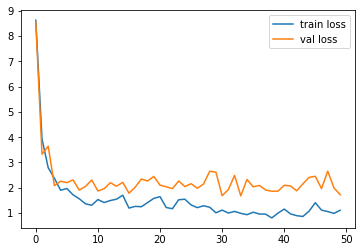

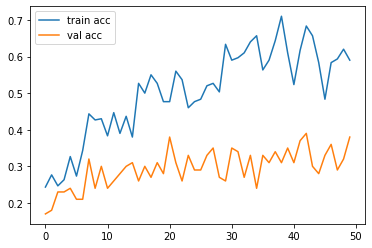

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

#### VGG16

In [83]:
r, model, test_set = create_model(VGG16, 'best_vgg16_model.h5')

Found 300 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 2.6209 - accuracy: 0.2433
Epoch 00001: saving model to best_vgg16_model.h5
10/10 [==============================] - 6s 507ms/step - loss: 2.6209 - accuracy: 0.2433 - val_loss: 2.1258 - val_accuracy: 0.2100
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 1.5079 - accuracy: 0.3833
Epoch 00002: saving model to best_vgg16_model.h5
10/10 [==============================] - 5s 466ms/step - loss: 1.5079 - accuracy: 0.3833 - val_loss: 1.8785 - val_accuracy: 0.3500
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 1.1804 - accuracy: 0.5700
Epoch 00003: saving model to best_vgg16_model.h5
10/10 [==============================] - 5s 498ms/step - loss: 1.1804 - accuracy: 0.5700 - val_loss: 1.3810 - val_accuracy: 0.4700
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.7039 - accuracy: 0.7233
Ep

Epoch 31/50
10/10 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 1.0000
Epoch 00031: saving model to best_vgg16_model.h5
10/10 [==============================] - 5s 474ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 1.0389 - val_accuracy: 0.6400
Epoch 32/50
10/10 [==============================] - ETA: 0s - loss: 0.0326 - accuracy: 1.0000
Epoch 00032: saving model to best_vgg16_model.h5
10/10 [==============================] - 5s 475ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 1.0229 - val_accuracy: 0.6300
Epoch 33/50
10/10 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 1.0000
Epoch 00033: saving model to best_vgg16_model.h5
10/10 [==============================] - 5s 484ms/step - loss: 0.0263 - accuracy: 1.0000 - val_loss: 1.0287 - val_accuracy: 0.6200
Epoch 34/50
10/10 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 1.0000
Epoch 00034: saving model to best_vgg16_model.h5
10/10 [========================

In [62]:
# VGG16 Model
model.save('model_vgg16.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 1s - loss: 1.0069 - accuracy: 0.6500 - 1s/epoch - 264ms/step
Restored model, accuracy: 65.00%


In [65]:
# VGG!6 model while checkpointing
model=load_model('best_vgg16_model.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 2s - loss: 1.0069 - accuracy: 0.6500 - 2s/epoch - 379ms/step
Restored model, accuracy: 65.00%


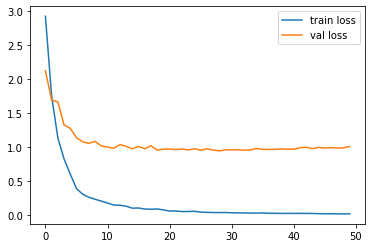

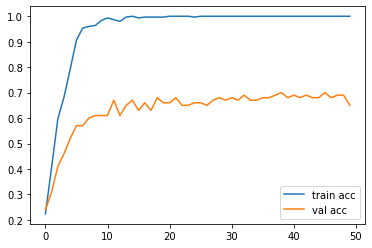

In [66]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

#### InceptionV3

In [70]:
r, model, test_set = create_model(InceptionV3,'best_inception_model.h5')

87924736/87910968 [==============================] - 12s 0us/step
Found 300 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 13.5134 - accuracy: 0.1967
Epoch 00001: saving model to best_inception_model.h5
10/10 [==============================] - 17s 987ms/step - loss: 13.5134 - accuracy: 0.1967 - val_loss: 7.2028 - val_accuracy: 0.4000
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 7.7936 - accuracy: 0.3967
Epoch 00002: saving model to best_inception_model.h5
10/10 [==============================] - 5s 549ms/step - loss: 7.7936 - accuracy: 0.3967 - val_loss: 5.4597 - val_accuracy: 0.4900
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 3.2103 - accuracy: 0.6000
Epoch 00003: saving model to best_inception_model.h5
10/10 [==============================] - 5s 554ms/step - loss: 3.2103 - accuracy: 0.6000 - val_loss: 3.7328 - val_accuracy: 0.4500
Epoch 4/50
10/1

10/10 [==============================] - ETA: 0s - loss: 0.0302 - accuracy: 0.9933
Epoch 00029: saving model to best_inception_model.h5
10/10 [==============================] - 10s 1s/step - loss: 0.0302 - accuracy: 0.9933 - val_loss: 3.2118 - val_accuracy: 0.5300
Epoch 30/50
10/10 [==============================] - ETA: 0s - loss: 0.0386 - accuracy: 0.9767
Epoch 00030: saving model to best_inception_model.h5
10/10 [==============================] - 10s 1s/step - loss: 0.0386 - accuracy: 0.9767 - val_loss: 3.0937 - val_accuracy: 0.5700
Epoch 31/50
10/10 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9900
Epoch 00031: saving model to best_inception_model.h5
10/10 [==============================] - 10s 1s/step - loss: 0.0212 - accuracy: 0.9900 - val_loss: 2.5367 - val_accuracy: 0.5900
Epoch 32/50
10/10 [==============================] - ETA: 0s - loss: 0.0277 - accuracy: 0.9900
Epoch 00032: saving model to best_inception_model.h5
10/10 [==========================

In [71]:
# Inception Model
model.save('model_inception.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 0s - loss: 2.3451 - accuracy: 0.6200 - 465ms/epoch - 116ms/step
Restored model, accuracy: 62.00%


In [72]:
# Inception model while checkpointing
model=load_model('best_inception_model.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 2s - loss: 2.3451 - accuracy: 0.6200 - 2s/epoch - 449ms/step
Restored model, accuracy: 62.00%


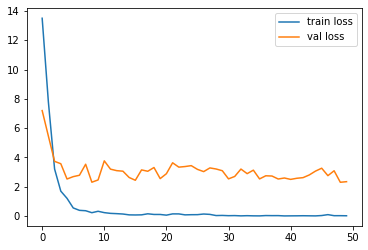

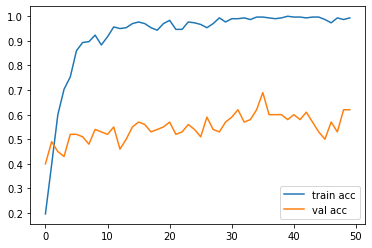

In [73]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

#### Xception

In [79]:
r, model, test_set = create_model(Xception,'best_xception_model.h5')

Found 300 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 8.2005 - accuracy: 0.3600
Epoch 00001: saving model to best_xception_model.h5
10/10 [==============================] - 8s 613ms/step - loss: 8.2005 - accuracy: 0.3600 - val_loss: 4.1534 - val_accuracy: 0.4500
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 3.2490 - accuracy: 0.5300
Epoch 00002: saving model to best_xception_model.h5
10/10 [==============================] - 5s 541ms/step - loss: 3.2490 - accuracy: 0.5300 - val_loss: 4.8052 - val_accuracy: 0.4700
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 2.2076 - accuracy: 0.6200
Epoch 00003: saving model to best_xception_model.h5
10/10 [==============================] - 5s 490ms/step - loss: 2.2076 - accuracy: 0.6200 - val_loss: 3.7647 - val_accuracy: 0.4700
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.8369 - accuracy: 

10/10 [==============================] - ETA: 0s - loss: 0.1125 - accuracy: 0.9633
Epoch 00030: saving model to best_xception_model.h5
10/10 [==============================] - 5s 481ms/step - loss: 0.1125 - accuracy: 0.9633 - val_loss: 3.7087 - val_accuracy: 0.6000
Epoch 31/50
10/10 [==============================] - ETA: 0s - loss: 0.3013 - accuracy: 0.9200
Epoch 00031: saving model to best_xception_model.h5
10/10 [==============================] - 5s 508ms/step - loss: 0.3013 - accuracy: 0.9200 - val_loss: 3.8314 - val_accuracy: 0.6300
Epoch 32/50
10/10 [==============================] - ETA: 0s - loss: 0.2645 - accuracy: 0.9500
Epoch 00032: saving model to best_xception_model.h5
10/10 [==============================] - 5s 508ms/step - loss: 0.2645 - accuracy: 0.9500 - val_loss: 3.6607 - val_accuracy: 0.6100
Epoch 33/50
10/10 [==============================] - ETA: 0s - loss: 0.0981 - accuracy: 0.9767
Epoch 00033: saving model to best_xception_model.h5
10/10 [========================

In [80]:
# Xception Model
model.save('model_xception.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 1s - loss: 3.8863 - accuracy: 0.5600 - 690ms/epoch - 173ms/step
Restored model, accuracy: 56.00%


In [81]:
# Xception model while checkpointing
model=load_model('best_xception_model.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 1s - loss: 3.8863 - accuracy: 0.5600 - 1s/epoch - 333ms/step
Restored model, accuracy: 56.00%


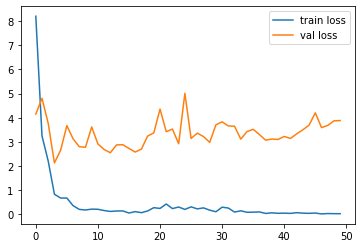

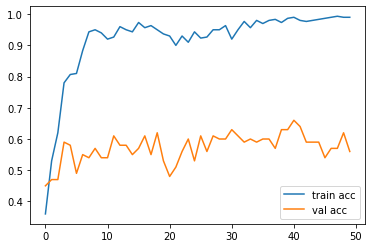

In [82]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [31]:
y_pred = model.predict(test_set)
y_pred

array([[1.69592695e-07, 2.16649103e-04, 9.98911977e-01, 8.71018856e-04,
        7.68050299e-08],
       [2.08510357e-07, 2.99187164e-08, 4.85197660e-10, 1.19171684e-09,
        9.99999762e-01],
       [8.72781873e-02, 9.12067950e-01, 1.60937774e-11, 4.19266172e-07,
        6.53482741e-04],
       [1.91141769e-17, 5.17057820e-11, 1.40428210e-13, 1.00000000e+00,
        1.11866676e-21],
       [2.18767952e-03, 2.70300627e-01, 2.88959265e-01, 4.38549399e-01,
        3.03914044e-06],
       [2.20894050e-02, 9.64282095e-01, 5.86817798e-04, 2.12016417e-07,
        1.30414730e-02],
       [9.99999642e-01, 7.85722278e-08, 1.16247875e-07, 6.55460823e-08,
        1.61555498e-08],
       [1.81030780e-01, 1.24928564e-01, 4.00988611e-05, 8.56863509e-04,
        6.93143725e-01],
       [9.98506725e-01, 1.49323465e-03, 5.02720227e-11, 2.85895840e-09,
        1.34879263e-09],
       [5.72759609e-06, 3.35837007e-02, 9.66410339e-01, 8.71626611e-08,
        1.66370555e-07],
       [3.40615213e-01, 5.9377

In [32]:
y_pred = numpy.argmax(y_pred,axis=1)
y_pred

array([2, 4, 1, 3, 3, 1, 0, 4, 0, 2, 3, 4, 1, 1, 1, 3, 0, 0, 1, 3, 0, 2,
       0, 3, 1, 3, 2, 2, 3, 0, 3, 1, 2, 3, 2, 2, 2, 2, 1, 4, 4, 1, 4, 1,
       4, 1, 0, 4, 0, 1, 2, 4, 2, 2, 1, 0, 3, 0, 4, 2, 1, 3, 0, 2, 3, 0,
       1, 3, 1, 4, 1, 2, 0, 3, 2, 3, 2, 0, 0, 0, 3, 4, 2, 3, 0, 1, 2, 2,
       1, 2, 3, 0, 1, 0, 1, 2, 4, 1, 2, 1], dtype=int64)

In [54]:
img = image.load_img('Datasets/Test/bmw/7.jpg',target_size=(224,224))
x = image.img_to_array(img)
x

array([[[199., 199., 197.],
        [199., 199., 197.],
        [199., 199., 197.],
        ...,
        [212., 205., 199.],
        [207., 207., 199.],
        [207., 207., 199.]],

       [[199., 199., 197.],
        [199., 199., 197.],
        [199., 199., 197.],
        ...,
        [212., 205., 199.],
        [207., 207., 199.],
        [207., 207., 199.]],

       [[199., 199., 197.],
        [199., 199., 197.],
        [199., 199., 197.],
        ...,
        [211., 204., 198.],
        [206., 206., 198.],
        [206., 206., 198.]],

       ...,

       [[151., 104.,  62.],
        [143.,  96.,  54.],
        [153., 108.,  66.],
        ...,
        [143.,  98.,  56.],
        [140.,  91.,  48.],
        [141.,  92.,  49.]],

       [[150., 103.,  61.],
        [144.,  97.,  55.],
        [146., 101.,  60.],
        ...,
        [137.,  92.,  50.],
        [146.,  97.,  54.],
        [141.,  94.,  50.]],

       [[146.,  99.,  57.],
        [141.,  93.,  53.],
        [134.,  

In [55]:
x.shape

(224, 224, 3)

In [56]:
x = x/255

In [57]:
x = numpy.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [58]:
pred = model.predict(img_data)
pred

array([[0.0000000e+00, 9.9968088e-01, 0.0000000e+00, 3.1908552e-04,
        0.0000000e+00]], dtype=float32)

In [59]:
pred = numpy.argmax(pred)
pred

1

In [60]:
print('Car brand is',os.listdir(test_path)[pred].capitalize())

Car brand is Bmw
